<a href="https://colab.research.google.com/github/siyosmith/cat-and-dog-classification-using-CNN/blob/main/cat%26dog_classi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
path = '/content/drive/MyDrive/cag & dog classi/training dataset'
classes = os.listdir(path)
classes


['cats', 'dogs']

Cat Images:


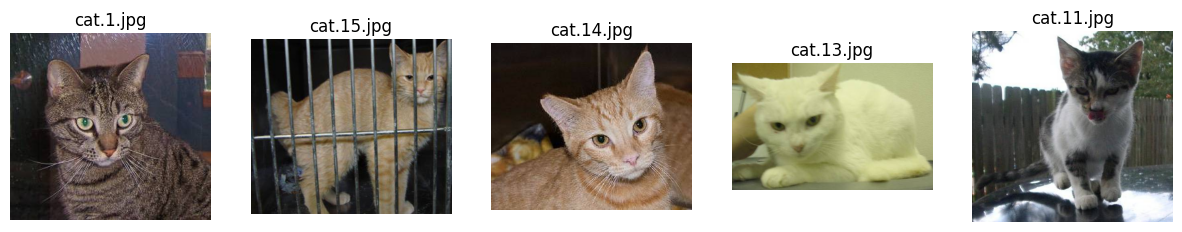

Dog Images:


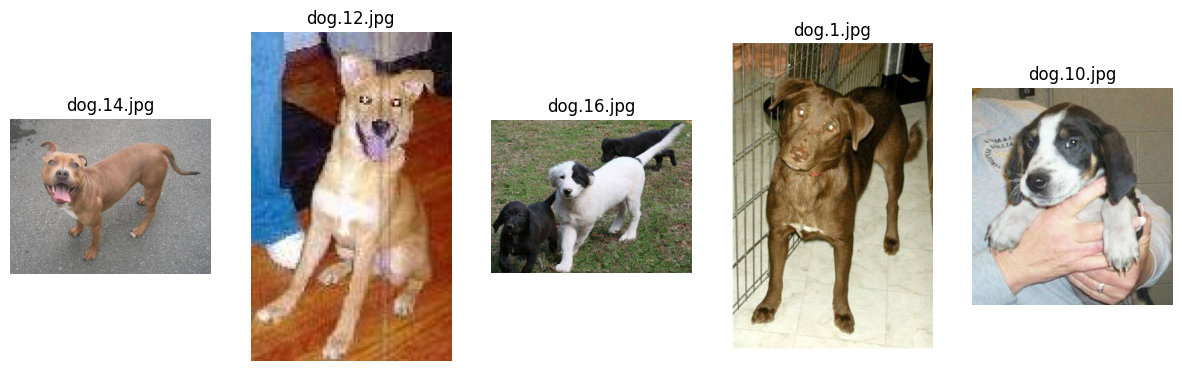

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_dir = '/content/drive/MyDrive/cag & dog classi/training dataset/cats'
dog_dir = '/content/drive/MyDrive/cag & dog classi/training dataset/dogs'
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

def visualize_images(image_dir, image_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_name in enumerate(image_names[:num_images]):
        image_path = os.path.join(image_dir, image_name)
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_name)

    plt.show()

# Visualize cat images
print("Cat Images:")
visualize_images(cat_dir, cat_names)

# Visualize dog images
print("Dog Images:")
visualize_images(dog_dir, dog_names)



In [ ]:
base_dir = '/content/drive/MyDrive/cag & dog classi'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 219 files belonging to 3 classes.
Using 198 files for training.
Found 219 files belonging to 3 classes.
Using 21 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

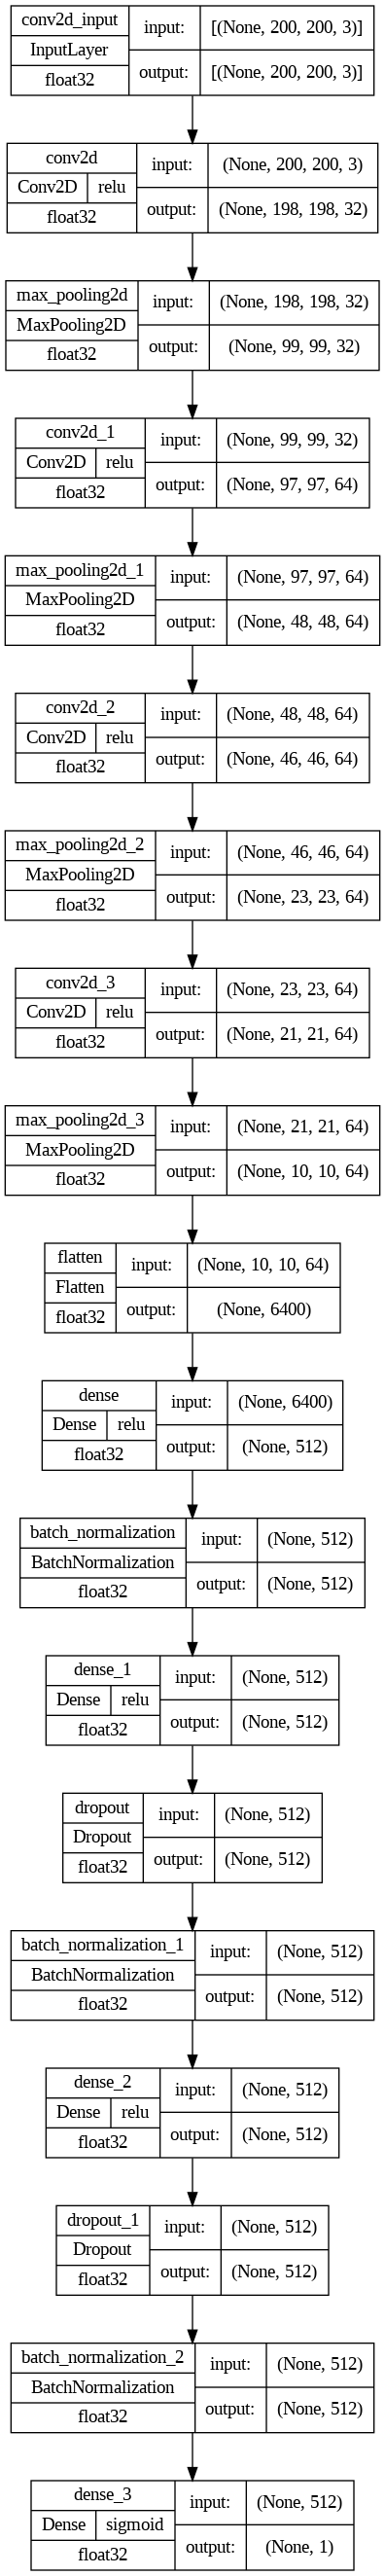

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [ ]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)


Epoch 1/10
7/7 [==============================] - 48s 3s/step - loss: 0.9114 - accuracy: 0.3081 - val_loss: -45.9279 - val_accuracy: 0.3333
Epoch 2/10
7/7 [==============================] - 22s 2s/step - loss: 0.7794 - accuracy: 0.2980 - val_loss: -3.2073 - val_accuracy: 0.3333
Epoch 3/10
7/7 [==============================] - 17s 2s/step - loss: 0.2139 - accuracy: 0.2879 - val_loss: -17.9465 - val_accuracy: 0.3333
Epoch 4/10
7/7 [==============================] - 16s 2s/step - loss: 0.0248 - accuracy: 0.2828 - val_loss: 5.6257 - val_accuracy: 0.1429
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: -0.1637 - accuracy: 0.2929 - val_loss: -6.9252 - val_accuracy: 0.3333
Epoch 6/10
7/7 [==============================] - 17s 2s/step - loss: -0.4500 - accuracy: 0.3182 - val_loss: 2.0182 - val_accuracy: 0.1905
Epoch 7/10
7/7 [==============================] - 16s 2s/step - loss: -0.7173 - accuracy: 0.2475 - val_loss: 5.8629 - val_accuracy: 0.1429
Epoch 8/10
7/7 [=========

1/1 [==============================] - 0s 221ms/step
cats


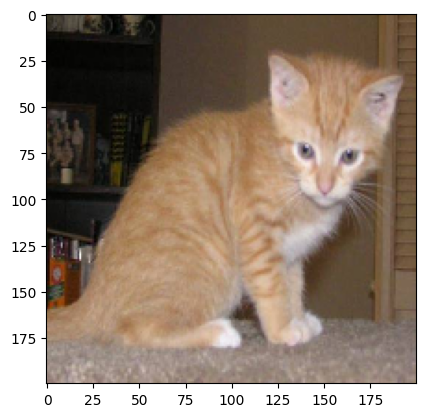

In [ ]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/drive/MyDrive/cag & dog classi/test dataset/cat/cat.4003.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("cats")
else:
  print("dogs")
